# Load the `Jirachi.jl` package
- if you have installed the packages in your own `julia` env, then you can load `Jirachi.jl` by:
  - ```push!(LOAD_PATH, "../../lib_julia_external/Jirachi")```

- it may take a fews seconds to precompile the package for the first time we load it, be patient.

In [3]:
# load Jirachi.jl
push!(LOAD_PATH, "../../lib_julia_external/Jirachi")
using Jirachi

#load package for plotting.
using CairoMakie
using MakiePublication

# Load light curves

- we use `lightcurve` structure to save the light curves
- elements can be assessed via `lc.time`, `lc.flux`, `lc.err`.

In [4]:
i_lc = load_data("./data/montano_n1_i_4395.txt", [1, 2, 3]; band="g")
z_lc = load_data("./data/montano_n1_z_4395.txt", [1, 2, 3]; band="z")

# convert time to second, and start it from 0 second.
i_lc.time = i_lc.time * 24 * 3600 
i_lc.time = i_lc.time .- i_lc.time[1]
z_lc.time = z_lc.time * 24 * 3600
z_lc.time = z_lc.time .- z_lc.time[1]

println(i_lc)
println(z_lc)

Loading lightcurve, band used: g-band
 

	 Time: 
		 min time: 0.0
		 max time: 23872.32
		 mean cadence: 105.16
		 median cadence: 103.68
 
	 Flux: 
		 mean flux: 0.6
		 median flux: 0.6
 
	 Error: 
		 mean error: 0.002149122807017544
		 median error: 0.002

Loading lightcurve, band used: z-band
 

	 Time: 
		 min time: 0.0
		 max time: 23880.96
		 mean cadence: 104.28
		 median cadence: 103.68
 
	 Flux: 
		 mean flux: 0.47
		 median flux: 0.47
 
	 Error: 
		 mean error: 0.0025826086956521744
		 median error: 0.003



## now get the light curves binned!
- you should input the bin size and where the bin start and end.

In [5]:
t_binsize = 103.68
lc_edges = bin_lc_edges(t_binsize, 0, 25000)

-51.84:103.68:25038.72

In [25]:
i_lc_bin = bin_light_curve(i_lc; lc_edges = lc_edges)
z_lc_bin = bin_light_curve(z_lc; lc_edges = lc_edges)

Loading lightcurve, band used: z-band

	 Time: 
		 min time: 0.0
		 max time: 24986.88
		 mean cadence: 103.68
		 median cadence: 103.68
	 Flux: 
		 mean flux: 0.47
		 median flux: 0.47
	 Error: 
		 mean error: 0.002535903435803951
		 median error: 0.0025606601717798215


In [27]:
lc1_bin, lc2_bin = get_common_lc(i_lc_bin, z_lc_bin)
# lc1_bin.band = "i_bin"
# lc2_bin.band = "z_bin"

(Loading lightcurve, band used: g-band

	 Time: 
		 min time: 0.0
		 max time: 23846.4
		 mean cadence: 110.91
		 median cadence: 103.68
	 Flux: 
		 mean flux: 0.6
		 median flux: 0.6
	 Error: 
		 mean error: 0.0021446418550329603
		 median error: 0.002
, Loading lightcurve, band used: z-band

	 Time: 
		 min time: 0.0
		 max time: 23846.4
		 mean cadence: 110.91
		 median cadence: 103.68
	 Flux: 
		 mean flux: 0.47
		 median flux: 0.47
	 Error: 
		 mean error: 0.002546160012724431
		 median error: 0.003
)

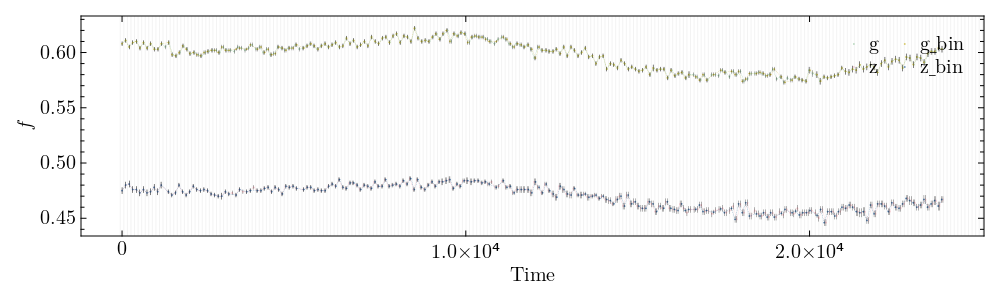

In [28]:
plotlc(i_lc, i_lc_bin, z_lc, z_lc_bin; label=[i_lc.band, i_lc.band * "_bin", z_lc.band, z_lc.band * "_bin"], lc_edges=lc_edges, save_fig_path="./fig/lc_check_i_z.svg", save_fig=true, hwratio=0.3)

In [32]:
# structure function 
sf_bin = 0.05
sf_bin_edges = 0:sf_bin:5 # in log space
mode = "both" # lc bootstrapped for structure function error
nsim = 1000 # lc bootstrapped for structure function error
lower_bounds = [0, 0, 0, 0.001]
upper_bounds = [10, 2e4, 2, 0.1]
p0 = [1, 1e3, 1, 0.005]

t_fit = 10 .^ range(log10(1), log10(6e4), step=0.1)

# color variation
cv_bin = 0.1
cv_bin_edges = 0:cv_bin:5 # in log space
nsigma = 3
erron=true

# save all run results.
fi_np::String="./data/run_i_z.h5"


"./data/run_i_z.h5"

In [34]:
fit_sf1 = fitsf_mcmc(lc1_bin; nsim=nsim, lb = lower_bounds , ub = upper_bounds, sf_bin_edges=sf_bin_edges, p0=p0, mode = mode)
fit_sf2 = fitsf_mcmc(lc2_bin; nsim=nsim, lb = lower_bounds, ub = upper_bounds, sf_bin_edges=sf_bin_edges, p0=p0, mode = mode)

binsf1, binsf2 = fit_sf1.binsf, fit_sf2.binsf

par_1, par_1_err = fit_sf1.param, fit_sf1.param_err
par_2, par_2_err = fit_sf2.param, fit_sf2.param_err


t_break_1 = find_t_break(binsf1)
t_break_2 = find_t_break(binsf2)

itp1 = find_t_min(binsf1, par_1; t_fit=t_fit)
itp2 = find_t_min(binsf2, par_2; t_fit=t_fit)

t_min_1, sf_min_1 = itp1.t_min, itp1.sf_min
t_min_2, sf_min_2 = itp2.t_min, itp2.sf_min

t_fit_1, sf_fit_1 = itp1.t_fit, itp1.sf_fit
t_fit_2, sf_fit_2 = itp2.t_fit, itp2.sf_fit

 
[10.0, 15135.612484362071, 2.0, 0.1]
[1.0, 1000.0, 1.0, 0.005]
 
 
sigma: 0.51 +/- 0.03 
beta: 1.55 +/- 0.09 
tau: 10.14 +/- 1.50 
SF: 5.45 +/- 0.35 
 


 
[10.0, 15135.612484362071, 2.0, 0.1]
[1.0, 1000.0, 1.0, 0.005]
 
 
sigma: 0.68 +/- 0.04 
beta: 1.68 +/- 0.12 
tau: 15.14 +/- 4.37 
SF: 7.05 +/- 1.15 
 


([1.0, 1.2589254117941673, 1.5848931924611136, 1.9952623149688797, 2.51188643150958, 3.1622776601683795, 3.981071705534973, 5.011872336272724, 6.309573444801933, 7.943282347242816  …  6309.573444801937, 7943.282347242822, 10000.0, 12589.254117941688, 15848.93192461114, 19952.62314968879, 25118.864315095823, 31622.776601683792, 39810.71705534977, 50118.72336272725], [0.009637444495962776, 0.009637456237643312, 0.009637473517918086, 0.009637498949343924, 0.009637536376799599, 0.009637591458736836, 0.009637672522560994, 0.009637791823391818, 0.00963796739635534, 0.009638225782106482  …  0.03338109466502504, 0.03899107359195465, 0.04520020840518295, 0.05172285514455356, 0.058075568858125134, 0.06360676830035142, 0.06767664740333608, 0.06999891251949453, 0.07090291474282255, 0.07110285181180569])

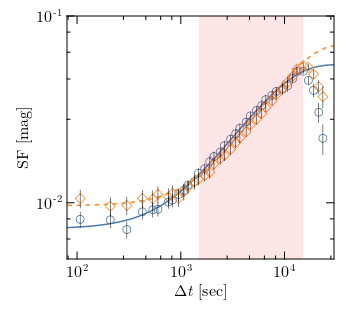

In [48]:

plotsf(binsf1, binsf2; fitsf1=[t_fit_1, sf_fit_1], fitsf2=[t_fit_2, sf_fit_2], proper_time = [t_min_1, t_break_1])